# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [26]:
# dataset = pd.read_csv('Alan.csv')
dataset = pd.read_csv('Alan.csv', usecols=["ID","dbn_nez", "dbe_nez", "dbz_nez","Labels"])
dataset = dataset.fillna(0)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [27]:
dataset.head()

,ID,dbn_nez,dbe_nez,dbz_nez,Labels
0,0,5.1,-16.8,-12.4,0.0
1,1,5.1,-16.8,-12.4,0.0
2,2,6.4,-17.2,-11.4,0.0
3,3,5.9,-16.4,-10.4,0.0
4,4,6.3,-15.1,-10.4,0.0


## Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [29]:
print(X_train)

[[ 7.575714e+06  2.120000e+01 -9.500000e+01  1.331000e+02]
 [ 5.348925e+06 -6.900000e+00 -1.600000e+00  6.500000e+00]
 [ 6.588314e+06  1.500000e+00 -5.200000e+00  3.000000e-01]
 ...
 [ 2.215104e+06  2.960000e+01  4.300000e+00  2.740000e+01]
 [ 1.484405e+06  2.900000e+01 -1.130000e+01  9.100000e+00]
 [ 4.500015e+06  4.430000e+01  2.500000e+01 -5.500000e+01]]


In [30]:
print(y_train)

[0. 0. 0. ... 0. 0. 0.]


In [31]:
print(X_test)

[[ 4.604817e+06 -8.570000e+01 -8.800000e+00 -4.820000e+01]
 [ 6.477916e+06 -5.460000e+01  1.670000e+01  3.050000e+01]
 [ 5.319570e+05 -2.500000e+00 -1.700000e+00  1.220000e+01]
 ...
 [ 4.726313e+06 -1.280000e+01 -1.000000e-01  2.110000e+01]
 [ 3.544679e+06  1.700000e+00 -4.500000e+00  7.400000e+00]
 [ 5.149331e+06 -1.440000e+01 -3.930000e+01  1.320000e+01]]


In [32]:
print(y_test)

[0. 0. 0. ... 0. 0. 0.]


## Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #avoid data leakage

In [34]:
print(X_train)

[[ 1.59499627  0.40122435 -2.389321    3.25518948]
 [ 0.61706567 -0.28659739 -0.0249713   0.01423698]
 [ 1.1613635  -0.0809852  -0.11610255 -0.14448265]
 ...
 [-0.75920279  0.60683654  0.1243827   0.54927574]
 [-1.08010113  0.59214995 -0.2705194   0.08079683]
 [ 0.24425304  0.96665787  0.64838739 -1.56015937]]


In [35]:
print(X_test.dtype)

float64


## Training the K-NN model on the Training set

In [36]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[]#calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1])#sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get first k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neighbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions


In [37]:
model=KNN(5) #our model
model.fit(X_train,y_train)

5


In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [39]:
y_pred = classifier.predict(X_test)

In [41]:
predictions=model.predict(X_test)#our model's predictions

KeyboardInterrupt: 

## Making the Confusion Matrix to compare both models

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

In [ ]:
cm = confusion_matrix(y_test, predictions) #our model
print(cm)
accuracy_score(y_test, predictions)

[[64  4]
 [ 3 29]]


0.93

## Visualising the Test set results 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


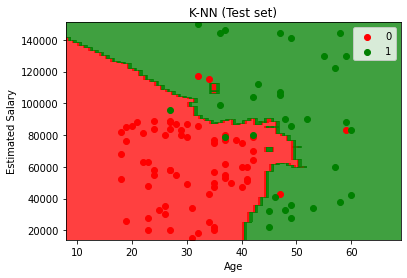

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()